In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pyplot as plt

In [2]:
def compute_purity(y_train, y_train_predict, y_actual, y_predict, y_label):
    
    cluster_label_map = dict()
    unique, counts = np.unique(y_train_predict, return_counts=True)
    cluster_dict = dict(zip(unique, counts))
    class_dict = dict()
    y_list = y_train[y_label].tolist()
    for i in y_train[y_label].unique():
        class_dict[i] = y_list.count(i)
    while cluster_dict:
        cluster = max(cluster_dict,key=cluster_dict.get)
        clas = max(class_dict,key=class_dict.get)
        cluster_label_map[cluster] = clas
        del cluster_dict[cluster]
        del class_dict[clas]
    y_pred = map(lambda x : cluster_label_map[x], y_predict)
    y_act = y_actual[y_label].tolist()
    
    correct = 0
    for i in range(0,len(y_act)):
        if y_act[i] == y_pred[i]:
            correct += 1
    purity = float(correct)/float(len(y_act))
    return purity

In [3]:
def plot_dendrogram(model, **kwargs):

    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

In [4]:
data = pd.read_csv("compressed_intrusion_data_b_2.csv",header=None)
heading = list()
for i in range(1,15):
    heading.append('A'+str(i))
heading.append('xAttack')
data.columns = heading
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,xAttack
0,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952,dos
1,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952,dos
2,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952,normal
3,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952,normal
4,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952,probe


In [5]:
cols = list()
for i in range(1,15):
    cols.append('A'+str(i))
X_train, X_test, y_train, y_test = train_test_split(
    data[cols],
    data[['xAttack']],
    test_size=0.3,
    random_state=0)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
8293,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952
23442,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952
13790,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952
4477,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952
708,0.999031,0.999892,0.999173,0.999408,0.998316,0.999864,0.998168,0.999122,0.99961,0.999556,0.999529,0.999619,0.999908,0.999952


In [6]:
agg = AgglomerativeClustering(n_clusters=5)
y_pred_tr_agg = agg.fit_predict(X_train)
y_pred_ts_agg = agg.fit_predict(X_test)

In [7]:
train_purity = compute_purity(y_train, y_pred_tr_agg, y_train, y_pred_tr_agg, 'xAttack')
test_purity = compute_purity(y_train, y_pred_tr_agg, y_test, y_pred_ts_agg, 'xAttack')
print '******************** Agglomerative Clustering ********************************'
print 'Train data set purity : '+str(round(train_purity*100,2))+'%'
print 'Test data set purity : '+str(round(test_purity*100,2))+'%'

******************** Agglomerative Clustering ********************************
Train data set purity : 46.85%
Test data set purity : 11.36%


RuntimeError: maximum recursion depth exceeded while calling a Python object

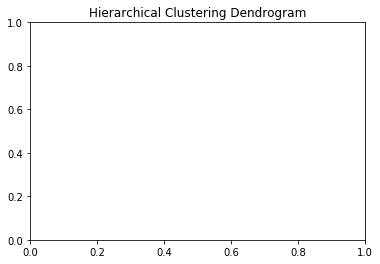

In [8]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg, labels=agg.labels_)
plt.show()